# Исследование продаж товаров (тестовое задание)

***Описание данных:***

 **Файл train_test.csv:**
- ID - уникальный код продажи;
- Order Date - дата продажи;
- Class - класс товара;
- Region - регион;
- Sub-Category - подгруппа
- Sales - сумма продажи.

**Ход исследования:**

Для начала работы получим данные из CSV-файла: ознакомимся с данными и при необходимости подкорректируем (подготовим к дальнейшему анализу). После проведём исследовательский анализ данных и ответим на важные вопросы исследования, затем подготовим презентацию нашей работы. Каждый этап подразумевает выполнение списка определённых задач, необходимых для достижения результата.

**Оглавление:**
1. [Знакомство с данными и их предобработка](#1):
- ознакомимся с датафреймом; 
- проверим наличие пропусков;
- проверим наличие явных дубликатов;
- проверим корректность типов данных;
- проверим наличие единого стиля (snake_case).

2. [Задание № 1](#2)
- Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
- Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
- Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

3. [Задание № 2](#3)
- Построить boxplot («Ящик с усами») на основе продаж (Sales).
- Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).

4. [Задание № 3](#4)
- Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
- Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

## Знакомство с данными и их предобработка
<a id="1"></a>

Подключим необходимые для анализа библиотеки:

In [19]:
# Импортируем необходимые для работы библиотеки

import pandas as pd

import seaborn as sns

import plotly.express as px

from plotly import graph_objects as go

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from datetime import datetime

Запишем датафрейм в переменную:

In [14]:
test_df = pd.read_csv('train_test.csv')
# при неправильном чтении необходимо добавить параметр 'sep'

In [15]:
test_df.sample(15)

,ID,Order Date,Class,Region,Sub-Category,Sales
9514,5684,02/04/2015,Стандарт,Москва,Phones,"39663,11"
9570,7586,21/03/2015,Стандарт,Москва,Paper,"22755,52"
8006,1575,15/12/2015,Первый класс,Урал,Phones,"26537,16"
270,1691,09/12/2018,Стандарт,Урал,Paper,"22190,35"
3479,2033,09/12/2017,Стандарт,Урал,Paper,"15429,29"
5252,3359,06/05/2017,Стандарт,Урал,Binders,"30809,18"
7476,4766,24/04/2016,Стандарт,Владивосток,Art,"12703,56"
6728,30,17/09/2016,Стандарт,Владивосток,Furnishings,"24610,82"
546,4871,24/11/2018,Стандарт,Владивосток,Paper,"4289,039"
3518,14,05/12/2017,Стандарт,Калиниград,Binders,"28464,43"


Первостепенно обращаем внимание на корректность чтения и названия атрибутов: файл прочитался адекватно (датафрейм имеет структуру согласно документации, а наименования в ячейках понятны для восприятия), названия атрибутов НЕ приведены к единому стилю.

Ознакомимся с каждым столбцом датафрейма:

Атрибут ID имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.
----------------------------------------------------------------------------------------------------------
Атрибут Order Date имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.
----------------------------------------------------------------------------------------------------------
Атрибут: Class
Количество уникальных значений: 4
Уникальные значения: ['Стандарт' 'Первый класс' 'Второй класс' 'Same Day']


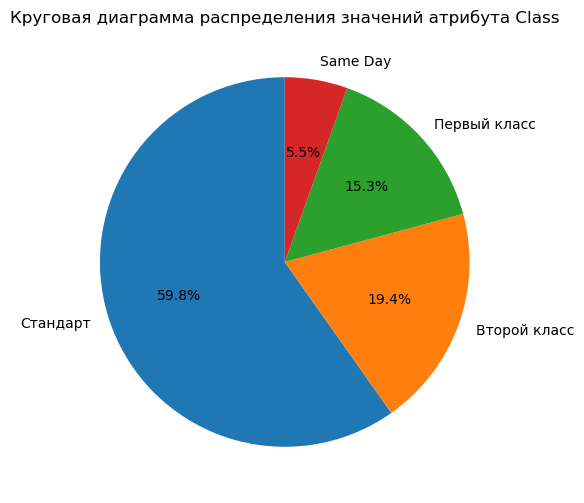

----------------------------------------------------------------------------------------------------------
Атрибут: Region
Количество уникальных значений: 4
Уникальные значения: ['Урал' 'Владивосток' 'Калиниград' 'Москва']


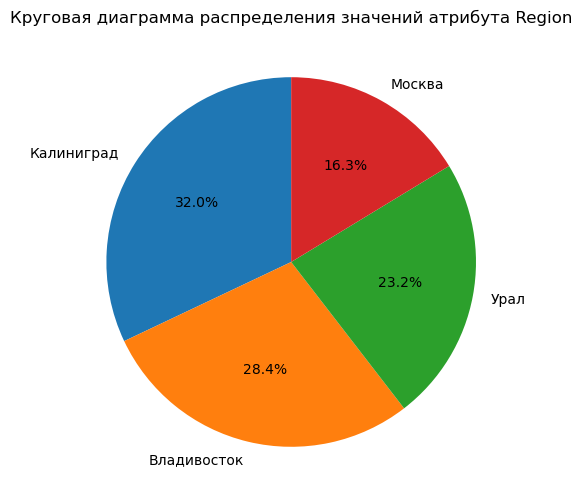

----------------------------------------------------------------------------------------------------------
Атрибут: Sub-Category
Количество уникальных значений: 17
Уникальные значения: ['Appliances' 'Bookcases' 'Phones' 'Binders' 'Fasteners' 'Chairs' 'Paper'
 'Furnishings' 'Art' 'Storage' 'Labels' 'Accessories' 'Tables' 'Supplies'
 'Machines' 'Copiers' 'Envelopes']


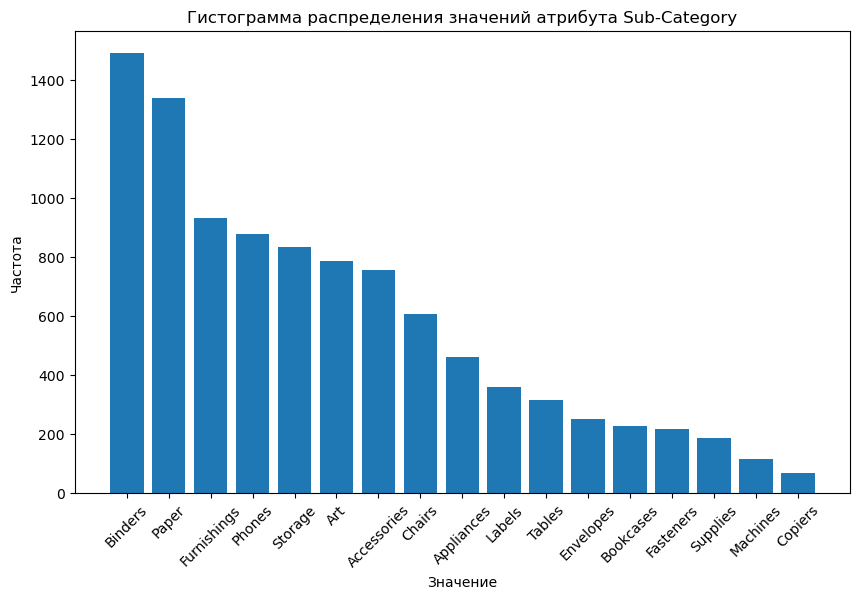

----------------------------------------------------------------------------------------------------------
Атрибут Sales имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.
----------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


In [16]:

def plot_distribution(df):
    """
    Функция для построения диаграмм распределения значений в DataFrame.

    df: DataFrame, для которого необходимо построить диаграммы.
    """
    for col_name in df.columns:
        len_uniq_values = len(df[col_name].unique())
        
        if len_uniq_values <= 20:
            print(f'Атрибут: {col_name}')
            print(f'Количество уникальных значений: {len_uniq_values}')
            print(f'Уникальные значения: {df[col_name].unique()}')

        if len_uniq_values <= 6:
            plt.figure(figsize=(10, 6))
            value_counts = df[col_name].value_counts()
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)  
            plt.title(f'Круговая диаграмма распределения значений атрибута {col_name}')
            plt.show()

        elif 7 <= len_uniq_values <= 20:
            plt.figure(figsize=(10, 6))
            value_counts = df[col_name].value_counts()
            plt.bar(value_counts.index, value_counts)
            plt.title(f'Гистограмма распределения значений атрибута {col_name}')
            plt.xlabel('Значение')  
            plt.ylabel('Частота')  
            plt.xticks(rotation=45)  # Поворачиваем метки оси X
            plt.show()

        else:
            print(f'Атрибут {col_name} имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.')

        print('----------------------------------------------------------------------------------------------------------')
        
    df.info()

plot_distribution(test_df)

- ID - уникальный код продажи: тип - int64, имеет большую вариативность, т.к. является уникальным кодом, корректный тип данных для первичного ключа.
- Order Date - дата продажи: тип - object, имеет большую вариативность, т.к. является датой, необходимо заменить тип данных на формат даты;
- Class - класс товара: тип - object, уникальных значений 4: ['Стандарт' 'Первый класс' 'Второй класс' 'Same Day'], корректный тип данных для категориальных данных, распределение согласно круговой диаграмме;
- Region - регион: тип - object, уникальных значений 4: ['Урал' 'Владивосток' 'Калиниград' 'Москва'], корректный тип данных для категориальных данных;
- Sub-Category - подгруппа: тип - object, уникальных значений 17: ['Appliances' 'Bookcases' 'Phones' 'Binders' 'Fasteners' 'Chairs' 'Paper', 'Furnishings' 'Art' 'Storage' 'Labels' 'Accessories' 'Tables' 'Supplies', 'Machines' 'Copiers', 'Envelopes'], корректный тип данных для категориальных данных;
- Sales - сумма продажи: тип - object, имеет большую вариативность, т.к. является непрерывной величиной, необходимо заменить тип данных на 'float'.


В 2-х атрибутах необходимо заменить тип данных: 

- Order Date: object -> datetime64
- Sales: object -> float

А также привести названия атрибутов к единому стилю.

Более детально ознакомимся с данными, используя функцию которая покажет нам количество и долю дубликатов:

In [17]:
def duplicated_sum(dataframes, names):
    for frame, name in zip(dataframes, names):
        duplicated_count = frame.duplicated().sum()
        print(f'\033[1m' + 'Количество дубликатов в таблице ' + name + ':' + '\033[0m', duplicated_count)
        temp = frame.copy()
        list_c = list(temp.columns)
        for col_l in list_c:
            print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
                  ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')
            print('-'* 25)
        display(pd.DataFrame(round(frame.isna().mean()*100,)).style.background_gradient('coolwarm'))
        display(frame.info())
        display(frame.head(5))
        print()

duplicated_sum([test_df], ['test_df'])

Количество дубликатов в таблице test_df: 0
ID : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
Order Date : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
Class : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
Region : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
Sub-Category : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
Sales : кол-во NaN 0 , процент NaN 0.0 %
-------------------------


,0
ID,0.000000
Order Date,0.000000
Class,0.000000
Region,0.000000
Sub-Category,0.000000
Sales,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


None

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


Пропусков нет, дубликатов нет, таким образом на предобработку выдвигаются следующие задачи:

- заменить типы данных в 2-х столбцах;
- привести атрибуты к единому стилю;
- рассмотрение выбросов сделаем по заданию, хотя этот пункт тривиально делают на этапе предобработки.

Замена типов данных:

In [25]:
# Дату продажи приводим к типу даты
test_df['Order Date'] = pd.to_datetime(test_df['Order Date'], format='%d/%m/%Y')


# Убираем пробелы и заменяем запятую на точку
test_df['Sales'] = test_df['Sales'].str.replace(' ', '')  # Удаляем пробелы, если они есть
test_df['Sales'] = test_df['Sales'].str.replace(',', '.')  # Заменяем запятую на точку

# Продажи делаем непрерывной величиной
test_df['Sales'] = test_df['Sales'].astype('float')

Приведём названия к единому стилю:

In [28]:
# Функция для приведения названий атрибутов к единому стилю
def snake_style(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
snake_style(test_df)

Проверим все наши изменения:

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9800 non-null   int64         
 1   order_date    9800 non-null   datetime64[ns]
 2   class         9800 non-null   object        
 3   region        9800 non-null   object        
 4   sub-category  9800 non-null   object        
 5   sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


Изменения корректно проведены.

Промежуточный итог: в нашем датафрейме мы не нашли пропусков и дубликатов, типы данных подобрали корректно (под корректностью подразумевается возможность использования всего функционала языка для обработки без ограничений из-за типа данных), установлен единый стиль названия столбцов, рассмотрение выбросов пройдёт в следующих этапах.

## Задание № 1
<a id="2"></a>

### Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?


Для решения необходимо сгруппировать данные по атрибуту с подгруппами, отсортировать по цене продажи, построить визуализацию:

In [34]:
# Найдём количество покупок по каждой категории
category_agg = test_df['sub-category'].value_counts()

# Столбчатая диаграмма: индекс - категория, значение - количество
fig = px.bar(x=category_agg.index, y=category_agg.values, 
              title='Количество покупок по подгруппам (столбчатая диаграмма)')

fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis_title="Подгруппа", 
                  yaxis_title="Количество покупок")
fig.show()

display(category_agg)

sub-category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

Наиболее часто покупаемые подгруппы(категории) за всё время:

Топ-4(по заданию):

- Binders: 1492;
- Paper: 1338;
- Furnishings: 931;
- Phones: 876;

Далее:

- Storage         832
- Art             785
- Accessories     756
- Chairs          607
- Appliances      459
- Labels          357
- Tables          314
- Envelopes       248
- Bookcases       226
- Fasteners       214
- Supplies        184
- Machines        115
- Copiers          66

Больше всего покупают связующие материалы, бумагу, мебель и телефоны.

### Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

В этом пункте необходимо сделать аналогичные действия, вот только нужно отфильтровать данные за определённый период:

In [36]:
# Определим крайную дату
max(test_df['order_date'])

Timestamp('2018-12-30 00:00:00')

2016-12-30: дата старта для нашего нового датафрейма с данными за последние 2 года.

In [41]:
test_df_last_2_years = test_df.loc[test_df['order_date'] >= '2016-12-30']

Проверим корректность нового датафрейма:

In [42]:
print(f'{min(test_df_last_2_years["order_date"])} - начальная дата датафрейма')
print(f'{max(test_df_last_2_years["order_date"])} - крайняя дата датафрейма')

2016-12-30 00:00:00 - начальная дата датафрейма
2018-12-30 00:00:00 - крайняя дата датафрейма


Найдём наиболее популярные категории за последние 2 года:

In [43]:
# Найдём количество покупок по каждой категории
category_agg_2 = test_df_last_2_years['sub-category'].value_counts()

# Столбчатая диаграмма: индекс - категория, значение - количество
fig = px.bar(x=category_agg_2.index, y=category_agg_2.values, 
              title='Количество покупок по подгруппам (столбчатая диаграмма) за последние 2 года')

fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis_title="Подгруппа", 
                  yaxis_title="Количество покупок")
fig.show()

display(category_agg_2)

sub-category
Binders        907
Paper          810
Furnishings    558
Phones         511
Storage        492
Art            458
Accessories    450
Chairs         348
Appliances     274
Labels         208
Tables         189
Envelopes      131
Bookcases      130
Fasteners      122
Supplies       118
Machines        66
Copiers         36
Name: count, dtype: int64

Топ-4 подгруппы за последние 2 года идентичен топ-4 подгруппам за всё время:

- Binders        907
- Paper          810
- Furnishings    558
- Phones         511

Далее расположение место идёт следующим образом:

- Storage        492
- Art            458
- Accessories    450
- Chairs         348
- Appliances     274
- Labels         208
- Tables         189
- Envelopes      131
- Bookcases      130
- Fasteners      122
- Supplies       118
- Machines        66
- Copiers         36

Тенденции топ-4 за последние 2 года подобны глобальному топ-4. В целом распределение мест категорий идентичное.

### Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

Используем тот же алгоритм действий:

In [49]:
test_df_last_3_years = test_df.loc[test_df['order_date'] >= '2017-12-30']

Проверим правильность:

In [50]:
print(f'{min(test_df_last_3_years["order_date"])} - начальная дата датафрейма')
print(f'{max(test_df_last_3_years["order_date"])} - крайняя дата датафрейма')

2017-12-30 00:00:00 - начальная дата датафрейма
2018-12-30 00:00:00 - крайняя дата датафрейма


Визуализируем:

In [51]:
# Найдём количество покупок по каждой категории
category_agg_3 = test_df_last_3_years['sub-category'].value_counts()

# Столбчатая диаграмма: индекс - категория, значение - количество
fig = px.bar(x=category_agg_3.index, y=category_agg_3.values, 
              title='Количество покупок по подгруппам (столбчатая диаграмма) за последние 2 года')

fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis_title="Подгруппа", 
                  yaxis_title="Количество покупок")
fig.show()

display(category_agg_3)

sub-category
Binders        496
Paper          454
Furnishings    310
Phones         291
Storage        283
Art            282
Accessories    266
Chairs         188
Appliances     161
Labels         114
Tables         104
Bookcases       76
Envelopes       71
Fasteners       63
Supplies        59
Machines        33
Copiers         22
Name: count, dtype: int64

Расположение мест категорий:

- Binders        496
- Paper          454
- Furnishings    310
- Phones         291
- Storage        283
- Art            282
- Accessories    266
- Chairs         188
- Appliances     161
- Labels         114
- Tables         104
- Bookcases       76
- Envelopes       71
- Fasteners       63
- Supplies        59
- Machines        33
- Copiers         22

Топ немного отличается от предыдущих, но не особо значительно: подгруппа "Envelopes" плднялась на одну позицию вверх, но всего с отрывом в одну покупку и т.д. 

**Вывод по заданию 1:**

Вообщем расположение мест по категориям за всё время, за последние 2 года, за последний год значительно не отличаются, но всё же наиболее актуальный и стабильный промежуток времени - это данные за 2 года, топ выглядит следующим образом:

- Binders        907
- Paper          810
- Furnishings    558
- Phones         511

- Storage        492
- Art            458
- Accessories    450
- Chairs         348
- Appliances     274
- Labels         208
- Tables         189
- Envelopes      131
- Bookcases      130
- Fasteners      122
- Supplies       118
- Machines        66
- Copiers         36

## Задание № 2
<a id="3"></a>

### Построить boxplot («Ящик с усами») на основе продаж (Sales).

- Ящик с усами по всем данным для 'sales':

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9800 non-null   int64         
 1   order_date    9800 non-null   datetime64[ns]
 2   class         9800 non-null   object        
 3   region        9800 non-null   object        
 4   sub-category  9800 non-null   object        
 5   sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


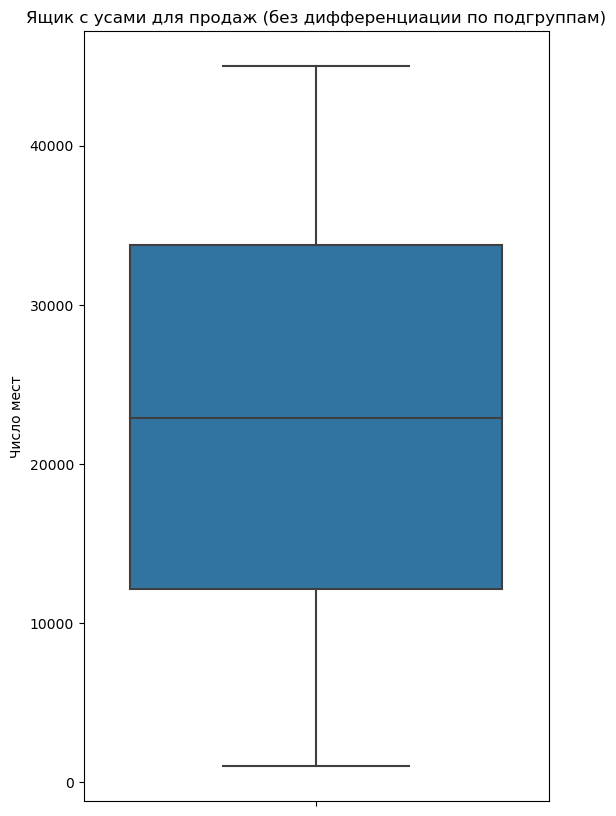

In [71]:
# Создаем график ящика с усами для всех данных
plt.figure(figsize=(6, 10))  
row_box_plots = sns.boxplot(y='sales', data=test_df)
row_box_plots.set_title('Ящик с усами для продаж (без дифференциации по подгруппам)')

# Названия осей
row_box_plots.set_ylabel('Число мест')  

plt.show()

Выбросов величины 'сумма продажи' не обнаружено, взглянем на значения описательных статистик более подробно:

In [74]:
test_df['sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: sales, dtype: float64

Медиана продаж равна 22882 у.е., межквартильный размах равен примерно 21595, стандартное отклонение = 12601.

Данные неплохо варьируются, но выбросов по одному ящику с усами вероятно нет.

Можно ещё взглянуть на выбросы в разрезе по категориям, правда категорий довольно много:

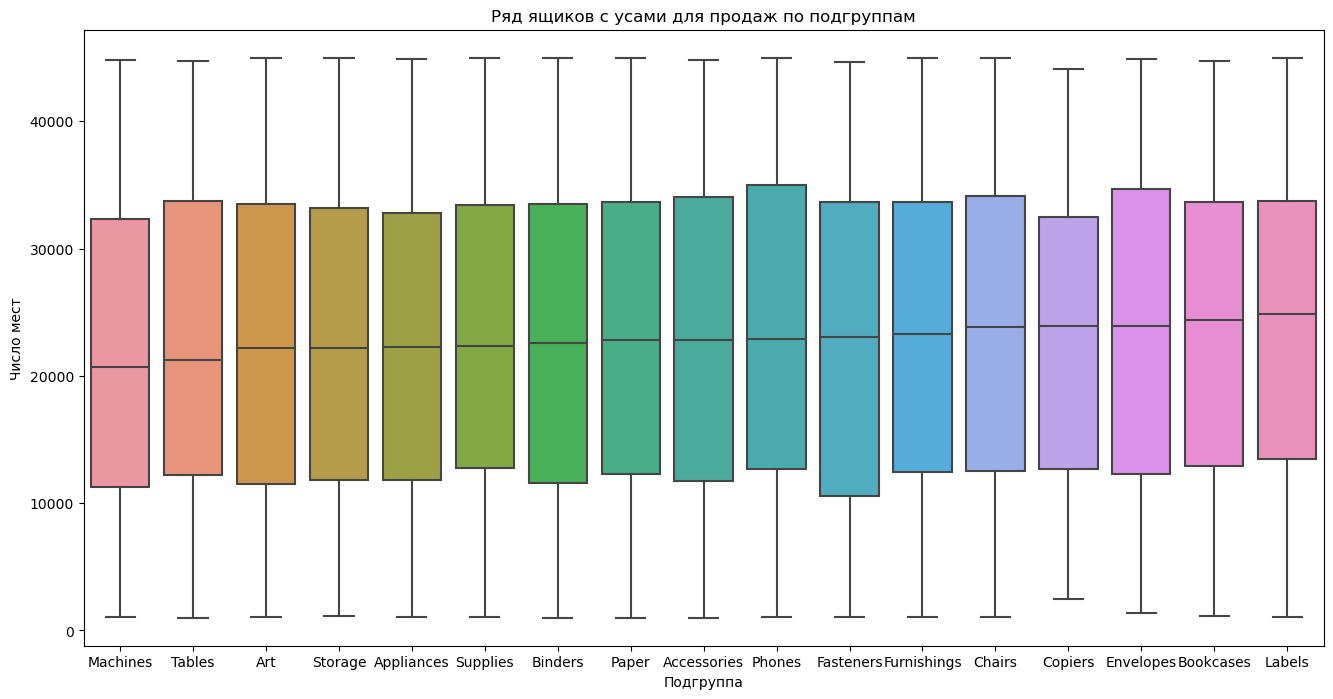

In [81]:
# Сортировка категорий по медиане 'sales'
sorted_categories = test_df.groupby('sub-category')['sales'].median().sort_values().index
plt.figure(figsize=(16, 8))

row_box_plots = sns.boxplot(x='sub-category', y='sales', data=test_df, order=sorted_categories)
row_box_plots.set_title('Ряд ящиков с усами для продаж по подгруппам')


# Названия осей
row_box_plots.set_xlabel('Подгруппа')  
row_box_plots.set_ylabel('Число мест')  
  
plt.show()

По подгруппам выбросов также нет, что здорово - данные довольно чистые.


### Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).

Аномалий у нас нет, черты выбросов можно обозначить по максимальному и минимальному значениям: 1002.79 и 44995.41 соответсвенно, ознакомиться лучше с распределением поможет гистограмма:

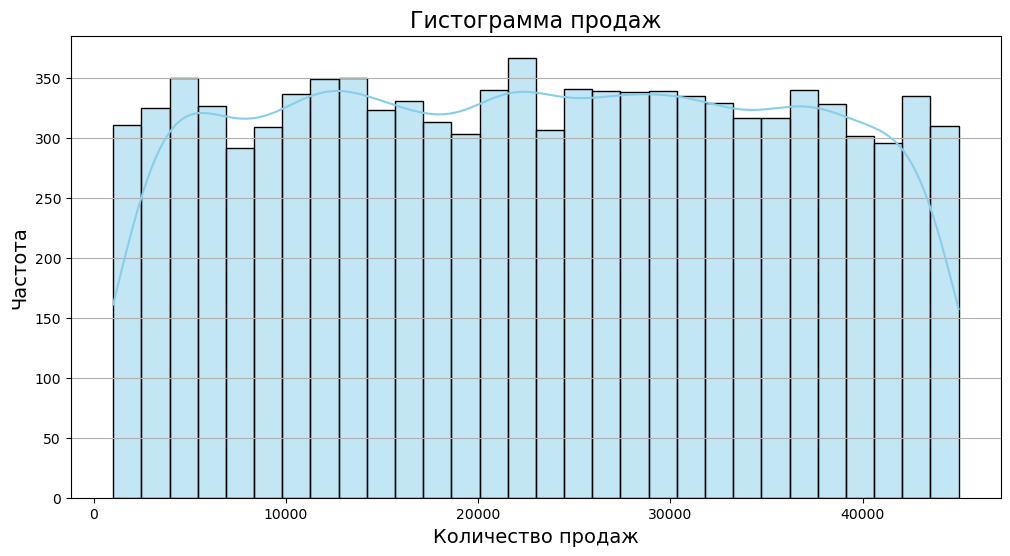

In [83]:

plt.figure(figsize=(12, 6))

# Создаем гистограмму для столбца 'sales'
sns.histplot(test_df['sales'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Добавляем заголовок и метки осей
plt.title('Гистограмма продаж', fontsize=16)
plt.xlabel('Количество продаж', fontsize=14)
plt.ylabel('Частота', fontsize=14)

# Настройка отображения сетки
plt.grid(axis='y')

# Показываем график
plt.show()

Довольно интересное распределение получилось: примерно симметричное, но уж точно не совсем нормальное. Исходя из гистограммы можно уже предположить что если поделить продажи на категории по объёму в у.е., то относительное соотношение категории будет похожим: не совсем тривиальная картина.

## Задание № 3
<a id="4"></a>

### Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales.

Ещё раз взглянем на описательные статистики:

In [84]:
test_df['sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: sales, dtype: float64

Создадим функцию для категоризации продаж:

- сумма до первого квартиля: "маленькие"
- сумма от первого квартиля до медианы : "средние"
- сумма от медианы до третьего квартиля : "высокие"
- сумма от третьего квартиля: "очень высокие".

In [85]:
def categorize_sale(sale):
    try:
        if 0 <= sale <= 12135:
            return 'маленькие'
        elif 12135 < sale <= 22882:
            return 'средние'
        elif 22882 < sale <= 33730:
            return 'высокие'
        elif sale > 33730:
            return 'очень высокие'
        else:
            return 'некорректное значение'
    except Exception as e:
        return f"Ошибка: {e}"

In [88]:
test_df['sale_group'] = test_df['sales'].apply(categorize_sale)

Проверим правильность написания и работы функции:

In [89]:
test_df.sample(10)

,id,order_date,class,region,sub-category,sales,sale_group
8177,1185,2015-11-24,Стандарт,Калиниград,Binders,31275.230,высокие
4706,3106,2017-07-25,Стандарт,Урал,Labels,30648.120,высокие
2646,3714,2018-04-21,Первый класс,Калиниград,Furnishings,13437.720,средние
4160,3501,2017-09-29,Стандарт,Москва,Binders,32446.240,высокие
1844,9183,2018-08-07,Стандарт,Калиниград,Accessories,31616.770,высокие
6707,5107,2016-09-19,Стандарт,Москва,Accessories,3279.629,маленькие
5401,1560,2017-04-09,Стандарт,Калиниград,Binders,14962.730,средние
85,3545,2018-12-23,Второй класс,Урал,Paper,32646.170,высокие
7561,5876,2016-04-07,Первый класс,Владивосток,Art,24101.440,высокие
4891,1286,2017-06-26,Стандарт,Владивосток,Storage,23363.090,высокие


In [92]:
print(test_df['sale_group'].unique())
print(test_df['sale_group'].isna().sum())

['очень высокие' 'средние' 'маленькие' 'высокие']
0


Пропусков и ошибочных значений не появилось, всё работает корректно.


### Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

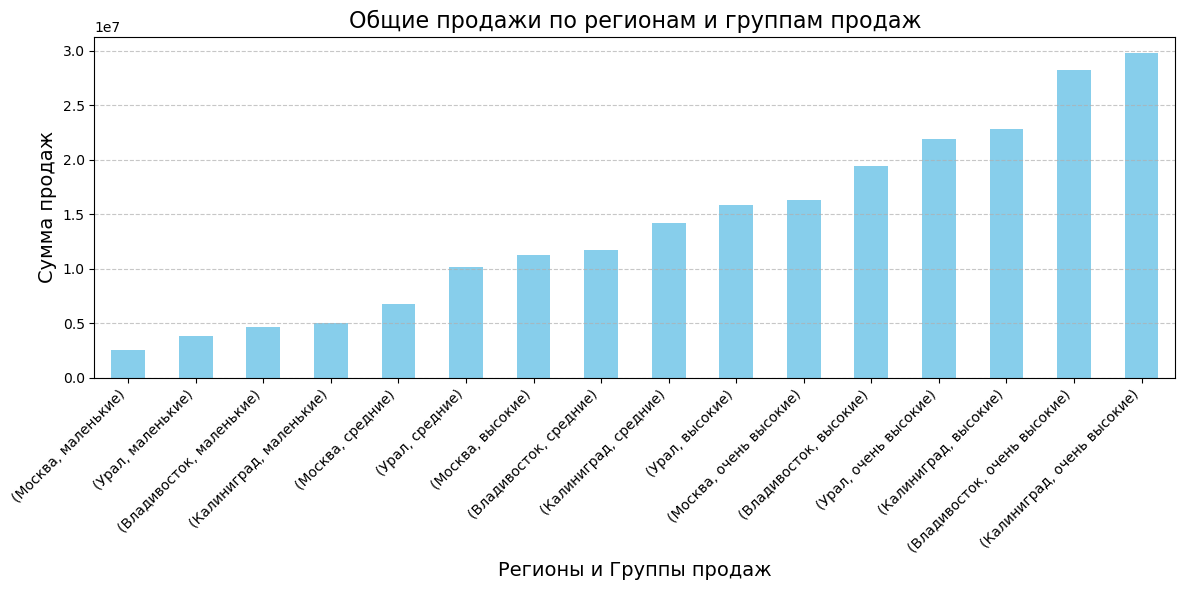

In [102]:
# Группируем данные, суммируем продажи и сортируем
group_df = test_df.groupby(['region', 'sale_group'])['sales'].sum().sort_values()

# Строим график
group_df.plot(kind='bar', figsize=(12, 6), color='skyblue')

# Настраиваем заголовок и подписи осей
plt.title('Общие продажи по регионам и группам продаж', fontsize=16)
plt.xlabel('Регионы и Группы продаж', fontsize=14)
plt.ylabel('Сумма продаж', fontsize=14)

# Настраиваем отображение значений на оси x
plt.xticks(rotation=45, ha='right')

# Опционально: добавляем сетку
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показываем график
plt.tight_layout()  # Улучшает размещение элементов
plt.show()

Распределение общих продаж зависит от категории продаж в основном: очень высокие  продажи приносят больше всего финансов, выоские поменьше и т.д., но есть небольшие исключения(видно из графика).

Подобной зависимости от регионов не наблюдается.

Топ-3 наиболее перспективных наборов:

- Калиниград, очень высокие;
- Владивосток, очень высокие;
- Калиниград, высокие.

Хочется выделить Калиниград как регион и категорию "очень высокие", наиболее интересный вариант.